In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
# Create toy dataset
'''
n_samples = 데이터 총 갯수
centers = CLASS NUMBER
n_features = 각 데이터 포인틑 피쳐(특성) 개수 지정
'''
x, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=777)


In [11]:
# Data to PyTorch Tensor
X = torch.from_numpy(x).float()
Y = torch.from_numpy(y).long()

In [12]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)

        return out

In [13]:
input_size = 2
num_classes = 3  

model = SoftmaxRegression(input_size, num_classes)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [15]:
# Train loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward and optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [100/1000], Loss: 0.0852
Epoch [200/1000], Loss: 0.0768
Epoch [300/1000], Loss: 0.0737
Epoch [400/1000], Loss: 0.0720
Epoch [500/1000], Loss: 0.0709
Epoch [600/1000], Loss: 0.0702
Epoch [700/1000], Loss: 0.0696
Epoch [800/1000], Loss: 0.0692
Epoch [900/1000], Loss: 0.0688
Epoch [1000/1000], Loss: 0.0684


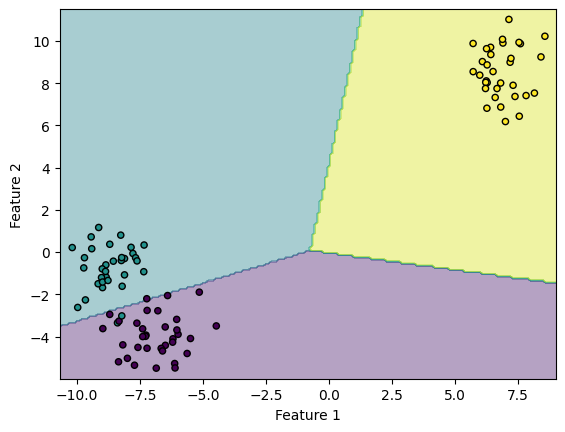

In [17]:
x_min, x_max = X[:, 0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, x[:,1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))

z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1, 1)), dim=1)).argmax(dim=1)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=Y, s=20, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
